In [1]:
pip install librosa==0.9.2


  Using cached librosa-0.9.2-py3-none-any.whl (214 kB)
  Using cached resampy-0.4.2-py3-none-any.whl (3.1 MB)
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0
    Uninstalling librosa-0.10.0:
      Successfully uninstalled librosa-0.10.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install IPython

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt 
import numpy as np

F:\anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
drone_nosource = "E:\glass omnion\DREGON_free-flight_speech-low_room1-[AudioTrimmer.com].wav"
wind_noise = "E:\glass omnion\epic-storm-thunder-rainwindwaves-no-loops-106800-[AudioTrimmer.com].wav"
bird_sound = "E:\glass omnion\mixkit-birds-in-forest-loop-1239-[AudioTrimmer.com].wav"
aircraft_sound = "E:\glass omnion\prop-plane-14513-[AudioTrimmer.com].mp3"

In [3]:
drone , sr =  librosa.load(drone_nosource) #sampling rate  = number of samples of waveform taken persecond 
                                            #to create a discrete audio signal actually the range of frequencies captured
                                        #more it is more snapshots we take of the signal''
thunder, _ = librosa.load(wind_noise)

bird, _ = librosa.load(bird_sound)
aircraft, _ = librosa.load(aircraft_sound)

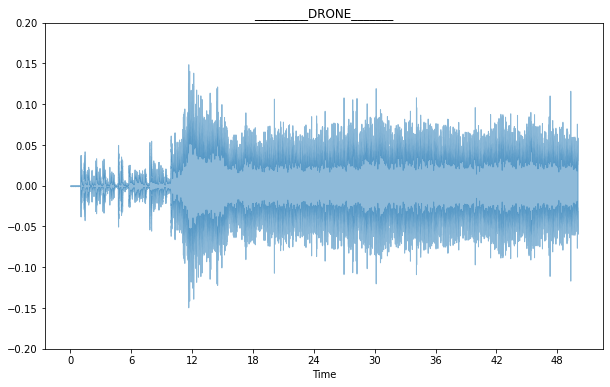

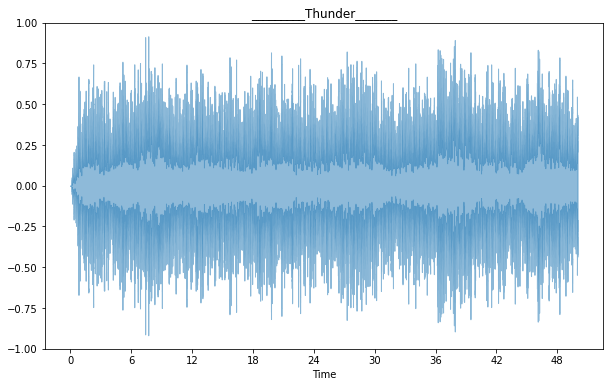

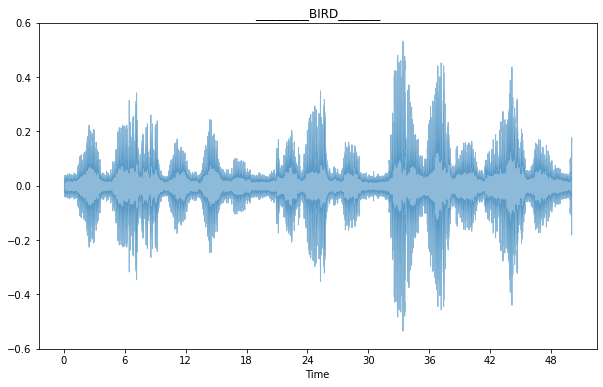

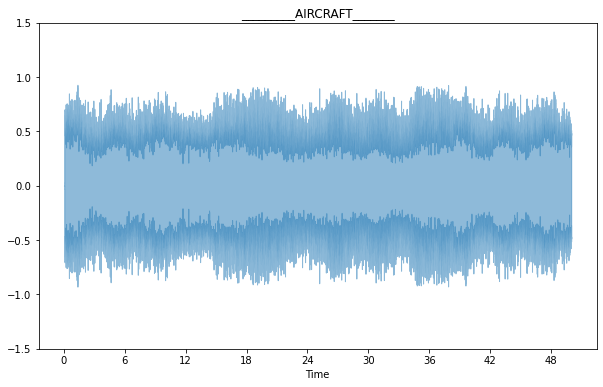

In [5]:
#def drone_show():
plt.figure(figsize=(10,6))
plt.subplot(1,1,1)

librosa.display.waveshow(drone, alpha = 0.5)
#librosa.display.waveshow(thunder,color="b",alpha=0.1)
plt.title("_________DRONE_______")

plt.ylim(-0.2,0.2)

plt.show()
#drone_show()
#def wind_show():
#_______________________________   
plt.figure(figsize=(10,6))

plt.subplot(1,1,1)

librosa.display.waveshow(thunder,alpha=0.5)
plt.title("_________Thunder_______")
plt.ylim(-1,1)
plt.show()
#_____________________________
plt.figure(figsize=(10,6))

plt.subplot(1,1,1)

librosa.display.waveshow(bird,alpha=0.5)
plt.title("_________BIRD_______")
plt.ylim(-0.6,0.6)
plt.show()

#_________________________________
plt.figure(figsize=(10,6))

plt.subplot(1,1,1)

librosa.display.waveshow(aircraft,alpha=0.5)
plt.title("_________AIRCRAFT_______")
plt.ylim(-1.5,1.5)
plt.show()


In [6]:
drone.size

1102500

In [7]:
thunder.size

1102500

In [8]:
drone.shape

(1102500,)

In [4]:
sample_duration = 1/sr 
#1 sample duration #that is duration of each sample period small chunk we have created 
 #in sampling rate as 1/sr = 1/hz = seconds(time unit)
#so it is length of the each sample i.e each sample duration'''

print(f" the sample duration is {sample_duration:.6f} seconds")
#.6f we want 6 decimal points

 the sample duration is 0.000045 seconds


In [5]:
signal_duration = sample_duration * len(drone) #duration of our sound
print(f"the signal duration is {signal_duration:.2f} seconds")
#duration of audio signal in seconds

the signal duration is 50.00 seconds


In [6]:
FRAME_SIZE = 1024 #number of samples in anaysis window or frame  means 1024 samples are selected each time to perform the extraction at 
                    #turn by turn
HOP_LENGTH = 512  #how much we have to shift to the right  OR OR OR it the number of samples in between each frame alwasy is lesswr so that 
                    #than frame size so that it overlaps on the part of the frame size
                    #why we do overlapp using hop length/size because 
                    #more overlap means we are ending up with mre frames/windows 
                    #more window overlap provides greater time locality of information
                
#calculate the amplitude envelope 

def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []
  

  #calculate Ae for each frame
    for i in range(0, len(signal), hop_length): #hop length shows how many frames we have to slip to the right 
        current_frame_amplitude_envelope = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(current_frame_amplitude_envelope)

    return np.array(amplitude_envelope)
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0,signal.size, hop_length)]) 

In [7]:
ae_drone = amplitude_envelope(drone, FRAME_SIZE, HOP_LENGTH)
len(ae_drone)

2154

In [8]:
ae_thunder = amplitude_envelope(thunder,FRAME_SIZE, HOP_LENGTH)
len(ae_thunder)

2154

In [9]:
ae_bird = amplitude_envelope(bird,FRAME_SIZE, HOP_LENGTH)
len(ae_thunder)

2154

In [10]:
ae_aircraft = amplitude_envelope(aircraft,FRAME_SIZE, HOP_LENGTH)
len(ae_thunder)

2154

In [11]:
fancy_ae_drone= fancy_amplitude_envelope(drone, FRAME_SIZE, HOP_LENGTH)
fancy_ae_thunder = fancy_amplitude_envelope(thunder, FRAME_SIZE, HOP_LENGTH)
fancy_ae_bird = fancy_amplitude_envelope(bird, FRAME_SIZE, HOP_LENGTH)
fancy_ae_aircraft = fancy_amplitude_envelope(aircraft, FRAME_SIZE, HOP_LENGTH)

In [12]:
(ae_drone ==fancy_ae_drone).all() #if the librosa drone ae is equal for the own calculated ae 

True

In [13]:
(ae_thunder==fancy_ae_thunder).all()

True

In [14]:
ae_drone.size

2154

In [15]:
ae_thunder.size

2154

In [16]:
drone.shape

(1102500,)

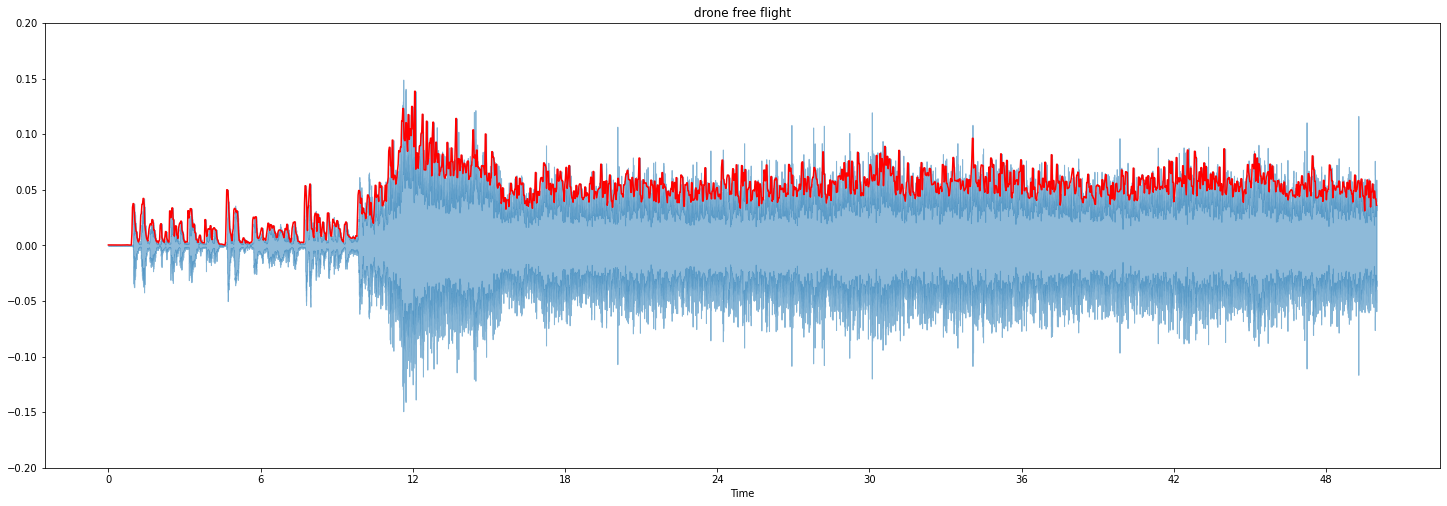

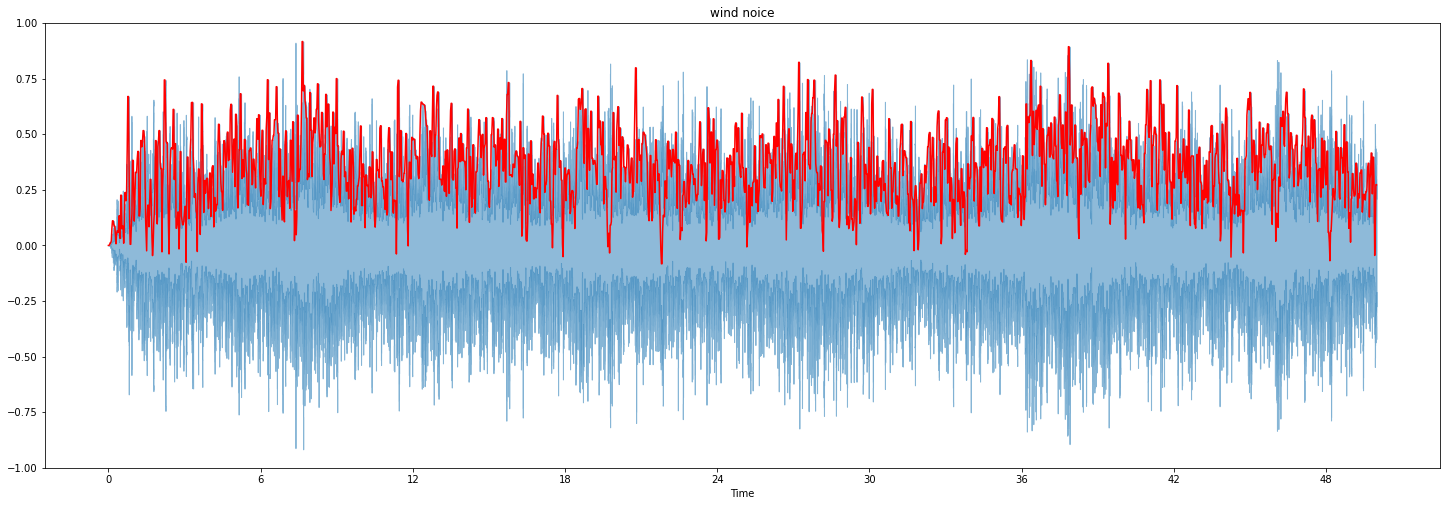

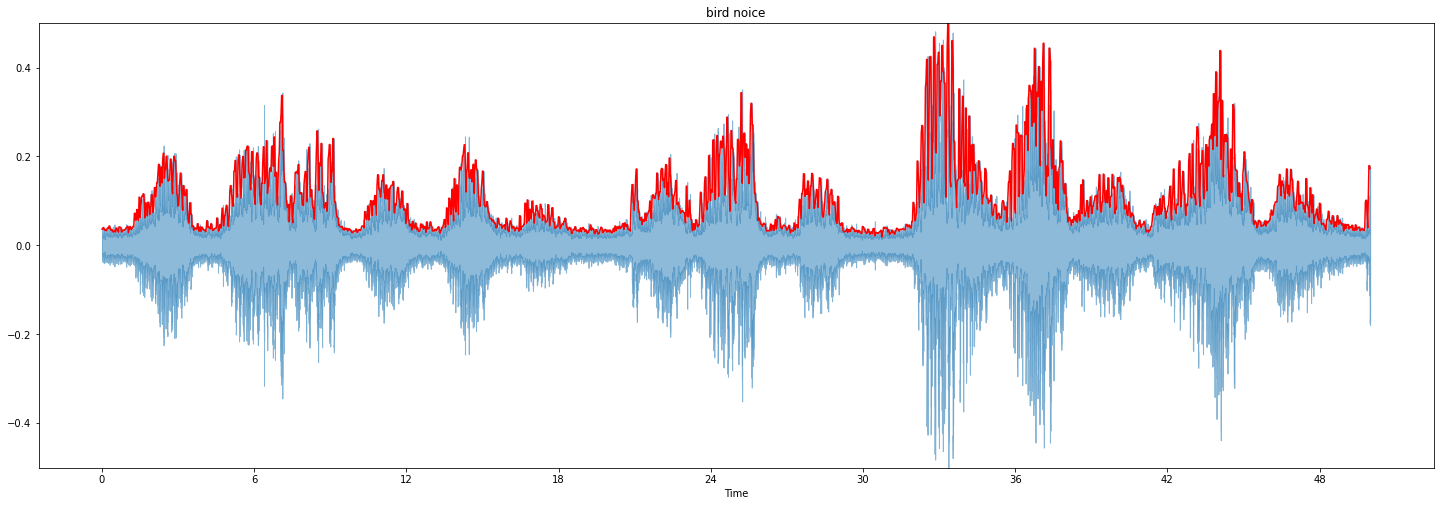

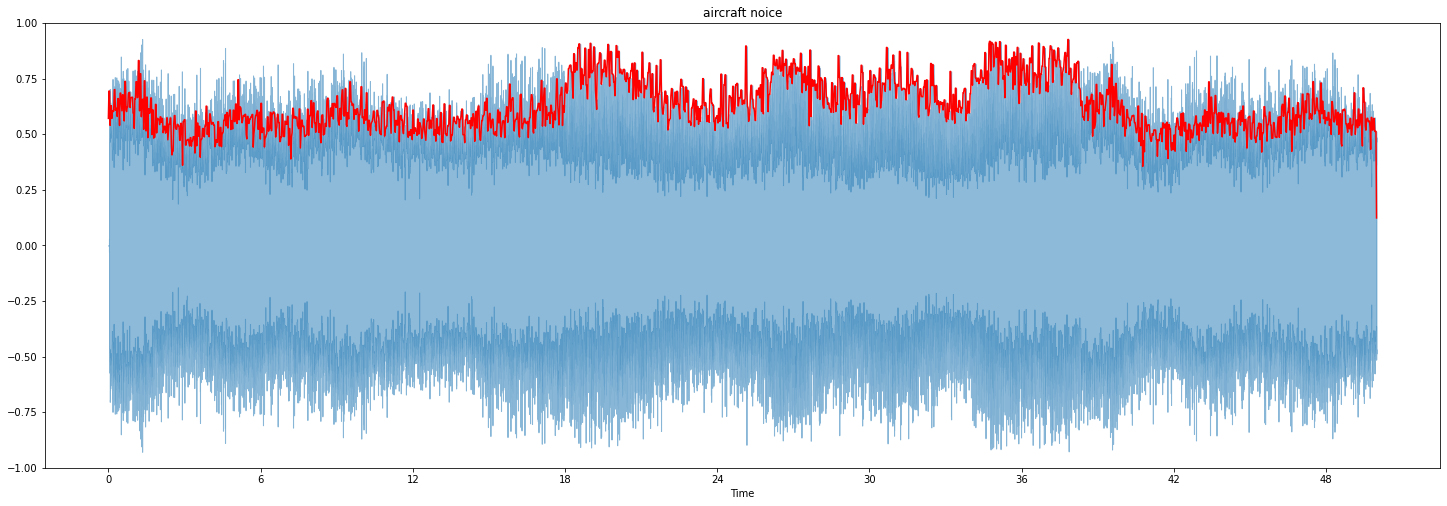

In [31]:
#visualization amplitude for all the audio files

frames = range(0,ae_drone.size)

t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(25,18))
plt.subplot(2, 1, 1)
librosa.display.waveshow(drone, alpha=0.5)
plt.plot(t,ae_drone, color="r")
plt.title("drone free flight")
plt.ylim((-0.2,0.2))


plt.figure(figsize=(25,18))
plt.subplot(2, 1, 1)
librosa.display.waveshow(thunder, alpha=0.5)
plt.plot(t,ae_thunder, color="r")
plt.title("wind noice")
plt.ylim((-1,1))

plt.figure(figsize=(25,18))
plt.subplot(2, 1, 1)
librosa.display.waveshow(bird, alpha=0.5)
plt.plot(t,ae_bird, color="r")
plt.title("bird noice")
plt.ylim((-0.5,0.5))

plt.figure(figsize=(25,18))
plt.subplot(2, 1, 1)
librosa.display.waveshow(aircraft, alpha=0.5)
plt.plot(t,ae_aircraft, color="r")
plt.title("aircraft noice")
plt.ylim((-1,1))


plt.show()

# RMS AND ZCR

In [32]:
FRAME_LENGTH = 1024  #SAME AS SIZE

rms_drone = librosa.feature.rms(drone, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[5.0599239e-05 2.6060217e-05 2.2599004e-05 ... 1.2765962e-02 1.1492370e-02
 5.7485984e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
rms_thunder = librosa.feature.rms(thunder, frame_length=FRAME_LENGTH, hop_length = HOP_LENGTH)[0]

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass y=[0.         0.         0.         ... 0.22406864 0.21526635 0.20595641] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


In [34]:
rms_bird = librosa.feature.rms(bird, frame_length=FRAME_LENGTH, hop_length = HOP_LENGTH)[0]

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass y=[ 0.0037013   0.01010615  0.01165779 ...  0.03797908  0.00839775
 -0.0342328 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


In [35]:
rms_aircraft = librosa.feature.rms(aircraft, frame_length=FRAME_LENGTH, hop_length = HOP_LENGTH)[0]

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass y=[ 2.0989433e-05  1.3439442e-04  3.6639377e-04 ... -1.7780213e-02
 -3.0402355e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


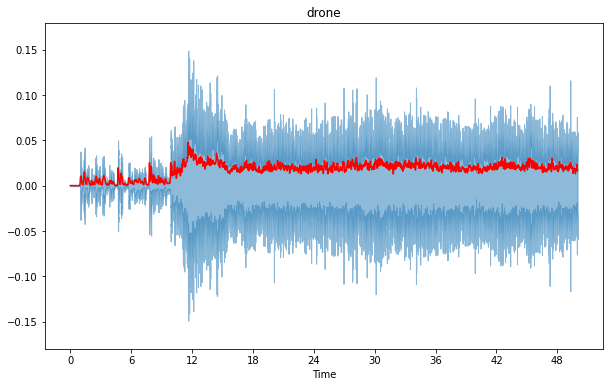

(-1.0, 1.0)

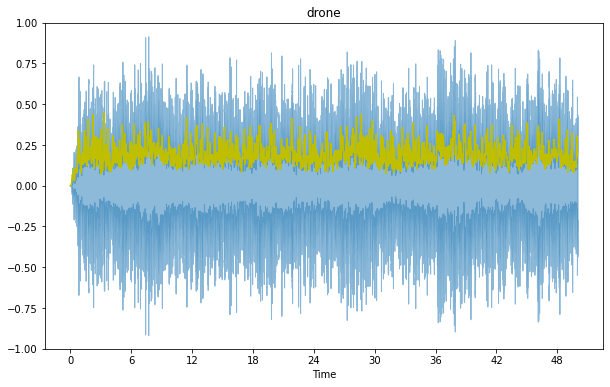

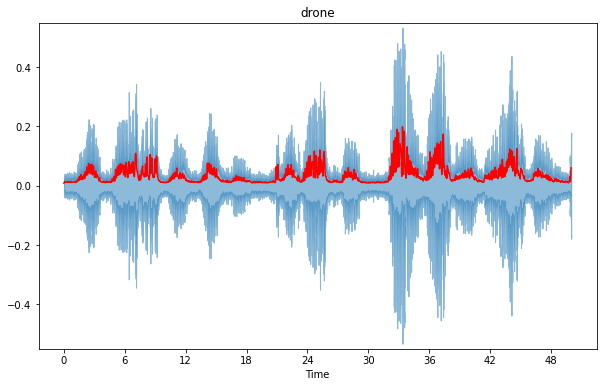

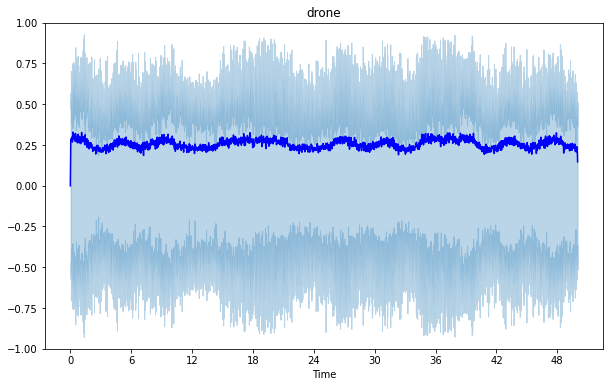

In [36]:
#rmse plotting
rms_frames = range(0, rms_drone.size)
rms_t=librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(10,6))
plt.subplot(1, 1, 1)
librosa.display.waveshow(drone, alpha=0.5)
plt.plot(rms_t,rms_drone, color="r")
plt.title("drone")
plt.ylim((-0.18,0.18))

plt.show()

plt.figure(figsize=(10,6))
plt.subplot(1, 1, 1)
librosa.display.waveshow(thunder, alpha=0.5)
plt.plot(rms_t,rms_thunder, color="y")
plt.title("drone")
plt.ylim((-1,1))

plt.figure(figsize=(10,6))
plt.subplot(1, 1, 1)
librosa.display.waveshow(bird, alpha=0.5)
plt.plot(rms_t,rms_bird, color="r")
plt.title("drone")
plt.ylim((-0.55,0.55))



plt.figure(figsize=(10,6))
plt.subplot(1, 1, 1)
librosa.display.waveshow(aircraft, alpha=0.3)
plt.plot(rms_t,rms_aircraft, color="b")
plt.title("drone")
plt.ylim((-1,1))



#representing red line the average power of the whole signal at each time
#red line shows mean sqyure root energy at each time intervral 

#rms and ae is somewhat similar but rms is much more robus t to outliers which means that rms does not fluctuate 
#easily i.e drastically changes hece can be used to find newly added instruments 
#associated with loudness 

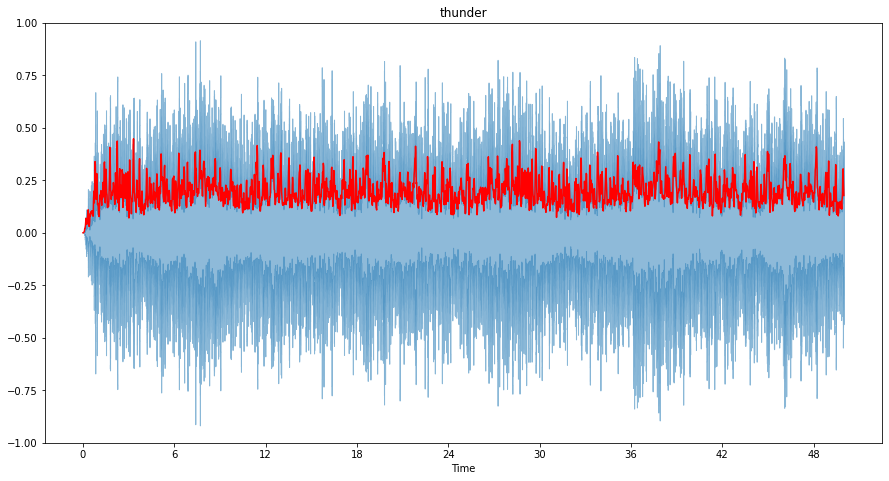

In [37]:
rms_frames = range(0, rms_thunder.size)
rms_t=librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))
plt.subplot(2, 1, 1)
librosa.display.waveshow(thunder, alpha=0.5)
plt.plot(rms_t,rms_thunder, color="r")
plt.title("thunder")
plt.ylim((-1,1))

plt.show()

In [38]:
# but now we will start plottinh the rms value by using only our own formula i.e already defied formula
#we wont be using python inbuilt function 
#and will try to print the rms value using the function createcdourself\
def rms(signal, frame_length, hop_length):
    rms= []
    for i in range(0, len(signal), hop_length):
        rms_current_frame = np.sqrt(np.sum(signal[i:i+frame_length]**2)/frame_length)
        rms.append(rms_current_frame)
    return np.array(rms)

In [39]:
rms1_drone = rms(drone, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)

In [40]:
rms1_thunder = rms(thunder, frame_length= FRAME_LENGTH, hop_length= HOP_LENGTH)

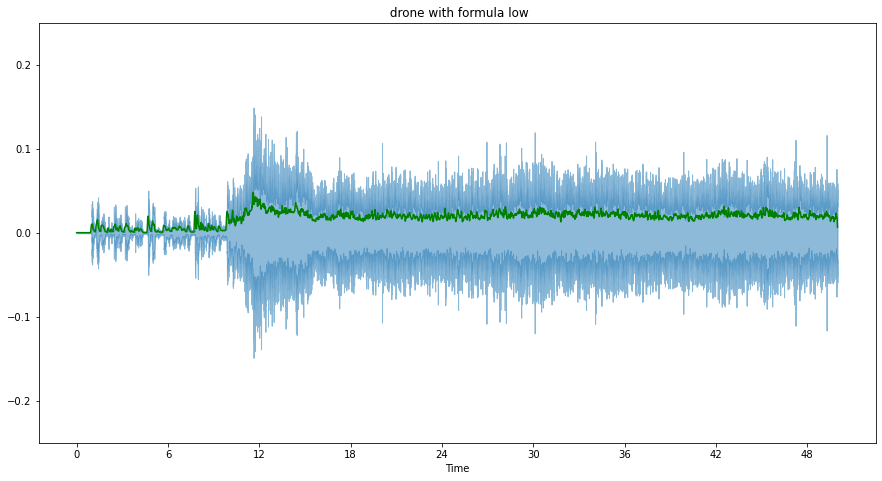

(-1.0, 1.0)

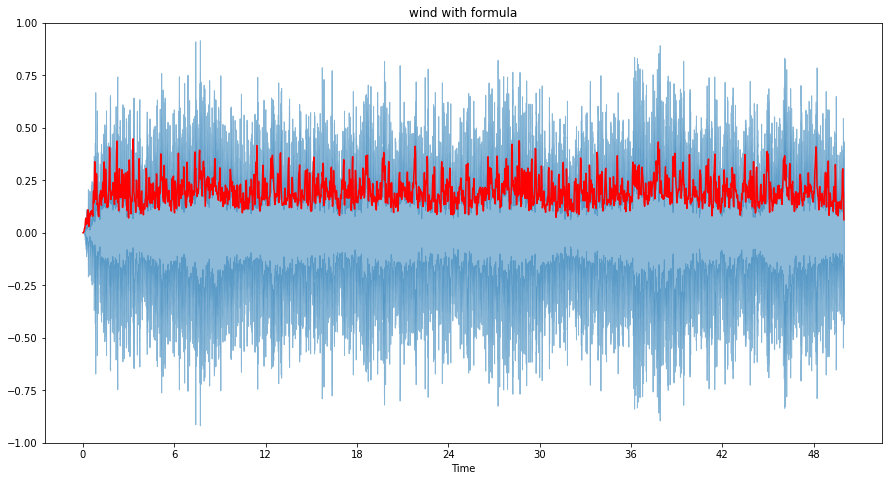

In [41]:
#Plot the rmse for drone(high_drone) pieces

plt.figure(figsize=(15,17))
plt.subplot(2, 1, 1)
librosa.display.waveshow(drone, alpha=0.5)
#plt.plot(t, rms_drone, color="r")
plt.plot(t, rms1_drone, color="g")
plt.title(" drone with formula low")
plt.ylim((-.25,.25))

plt.show()


plt.figure(figsize=(15,17))
plt.subplot(2, 1, 1)
librosa.display.waveshow(thunder, alpha=0.5)
#plt.plot(t, rms_drone, color="g")
plt.plot(t, rms1_thunder, color="r")
plt.title("wind with formula")
plt.ylim((-1,1))



zero crossing rate

In [42]:
zcr_drone = librosa.feature.zero_crossing_rate(drone, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]


In [43]:
zcr_thunder =  librosa.feature.zero_crossing_rate(thunder, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [44]:
zcr_bird =  librosa.feature.zero_crossing_rate(bird, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [45]:
zcr_aircraft =  librosa.feature.zero_crossing_rate(aircraft, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

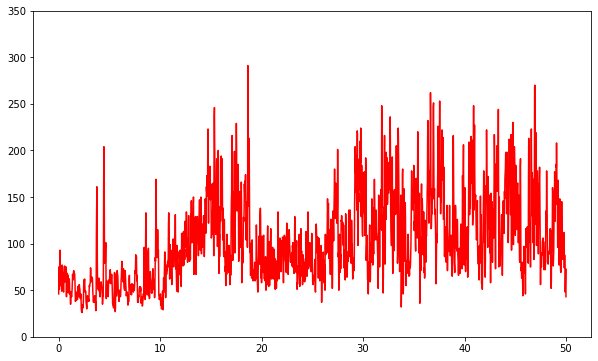

(0.0, 200.0)

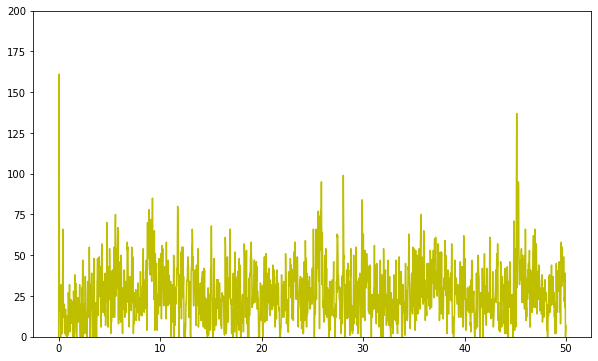

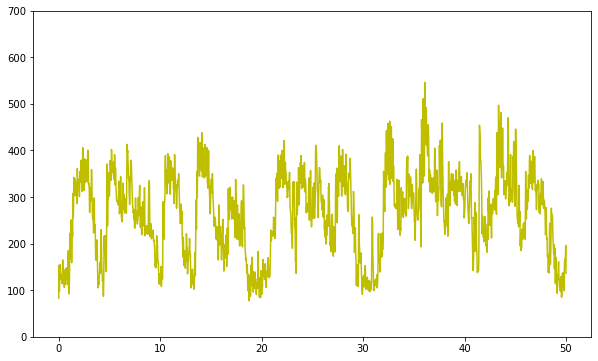

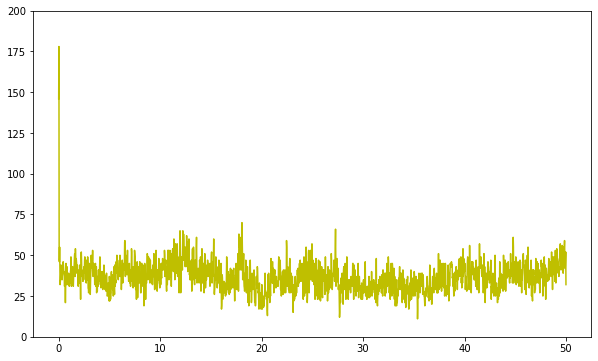

In [46]:
#visualizing the zero crossing rate


plt.figure(figsize=(10,6))
plt.plot(t, zcr_drone * FRAME_LENGTH, color  = "r" ) #if you want normalized (meaning chanding the value to 
#plt.plot(t, zcr_thunder * FRAME_LENGTH, color  = "y" )                                                   #the scale of 0 to 1 )zcr then simply plot the zcr in the same range
                                                          #without multiplying with frame length
                                                          #but if you want the actual
                                                          #value of the zcr then multiply the zcr value with Frame length

plt.ylim(0,350)
plt.show()
#how many times the wave form passes from horizontal zeroth axis i.e how many times waves 
#has passes + and - axis or + and - amplitude


plt.figure(figsize=(10,6))
plt.plot(t, zcr_thunder * FRAME_LENGTH, color  = "y" )

plt.ylim(0,200)

plt.figure(figsize=(10,6))
plt.plot(t, zcr_bird * FRAME_LENGTH, color  = "y" )

plt.ylim(0,700)

plt.figure(figsize=(10,6))
plt.plot(t, zcr_aircraft * FRAME_LENGTH, color  = "y" )

plt.ylim(0,200)

# fourier transformation

In [47]:
drone_ft = np.fft.fft(drone)  # first fft is a module that include the classification and implementatio of fft 
# by doing this we are moving fro time domain to frequency so therefore there is fourier transformation

In [48]:
thunder_ft = np.fft.fft(thunder)

In [49]:
bird_ft = np.fft.fft(bird)

In [50]:
aircraft_ft = np.fft.fft(aircraft)

In [51]:
drone_ft[0]

(-20.66109055324763+0j)

In [52]:
thunder_ft[0]

(1166.3509822440215+0j)

In [53]:
magnitude_spectrum_drone = np.abs(drone) #individual magnitude value i,e how much a particular 
                                            #frequency is present in the signal

In [54]:
magnitude_spectrum_thunder = np.abs(thunder) 

In [55]:
magnitude_spectrum_thunder = np.abs(bird) 

In [56]:
magnitude_spectrum_thunder = np.abs(aircraft) 

In [57]:
def plot_magnitude_spectrum(signal, title, sr, f_ratio=0.4):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)

  #plot magnitude spectrum

    plt.figure(figsize=(10,7))

    frequency  = np.linspace(0,sr, len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency) * f_ratio)

    plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
    plt.xlabel("frequency (HZ) ")
    plt.title(title)

    plt.show()
 

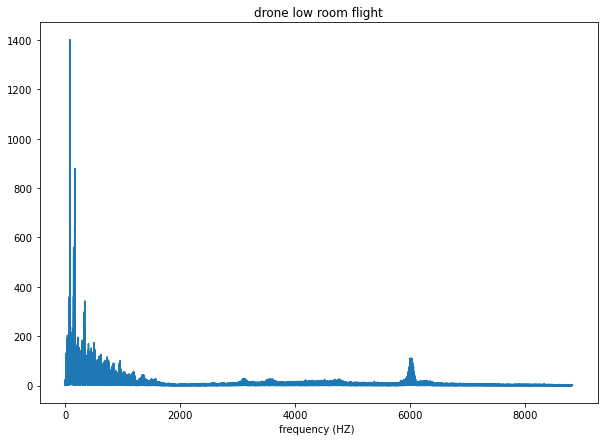

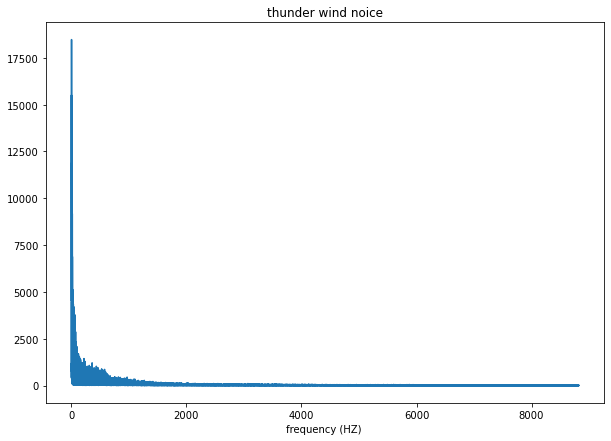

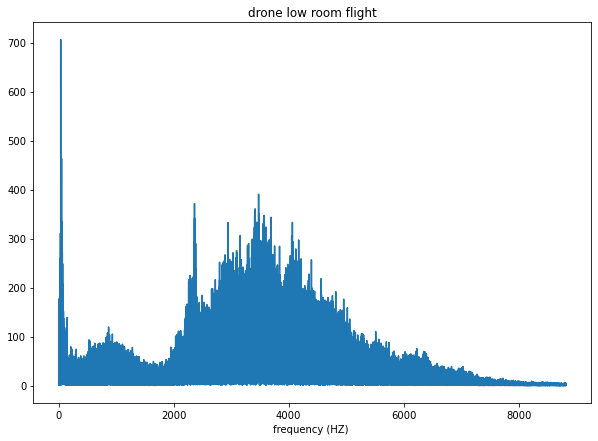

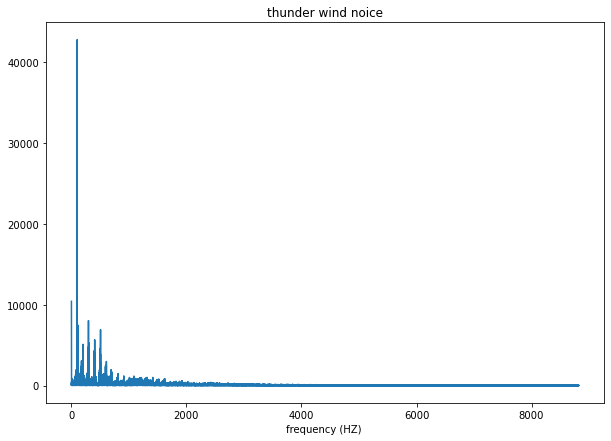

In [58]:
plot_magnitude_spectrum(drone, "drone low room flight" , sr) #magnitude on y axis i.e how much a partivular dfrequency 
                                                                    #on x axis is present in the signal
#so this can help to get most dominant frequency in the graph and then it can be used to filter out the noise in the signal.
''' the magnitude spectrum graph of the FFT is a powerful tool for analyzing the frequency content of a
signal and is widely used in signal processing applications such as audio and image processing, 
communication systems, and control systems.'''

plot_magnitude_spectrum(thunder, "thunder wind noice", sr)

plot_magnitude_spectrum(bird, "drone low room flight" , sr) #magnitude on y axis i.e how much a partivular dfrequency 
                                                                    #on x axis is present in the signal
#so this can help to get most dominant frequency in the graph and then it can be used to filter out the noise in the signal.
''' the magnitude spectrum graph of the FFT is a powerful tool for analyzing the frequency content of a
signal and is widely used in signal processing applications such as audio and image processing, 
communication systems, and control systems.'''

plot_magnitude_spectrum(aircraft, "thunder wind noice", sr)




In [164]:
def signaltonoiseratio(signal, axis , ddof):
    m = signal.mean(axis)
    sd = signal.std(axis = axis , ddof=ddof)
    return np.where(sd==0, 0 ,m/sd)
#The code you provided defines a function signaltonoiseratio that takes three arguments: signal, axis, and ddof.

#The function calculates the signal-to-noise ratio (SNR) of a signal along a specified axis 
#using the formula SNR = mean(signal, axis) / std(signal, axis, ddof),
#where mean and std are the mean and standard deviation functions in numpy, respectively. 
#The axis parameter specifies the axis along which the mean and standard deviation 
#are calculated, and ddof is the delta degrees of freedom for the standard deviation calculation.

#Here is a breakdown of how the function works:

#Calculate the mean of the signal along the specified axis using signal.mean(axis), and assign it to m.
#Calculate the standard deviation of the signal along the specified axis using signal.std(axis=axis, ddof=ddof), and assign it to sd.
#Use numpy's where function to replace any values in sd that are zero with zero, and divide m by sd to calculate the signal-to-noise ratio.
#Return the signal-to-noise ratio.
#Note that if the standard deviation along the specified axis is zero,
#the function returns a signal-to-noise ratio of zero, which is not a meaningful value. 
#In practice, this can occur if the signal is perfectly flat (i.e., has no variation) along the specified axis.

In [165]:
print("signal to noise ratio : ", signaltonoiseratio(drone, axis=0, ddof = 0)) #negative value means that the noiose is greater actual signal

signal to noise ratio :  -0.0009564749780111015


In [166]:
print("signal to noise ratio : ", signaltonoiseratio(thunder, axis=0, ddof = 0))

signal to noise ratio :  0.005057171918451786


# short term fourier tramsform

In [59]:
#stft -  It is a variation of the Fourier Transform that analyzes small,
            #overlapping sections of a signal, rather than the entire signal at once.
    #The STFT breaks down a signal into a series of short time windows, typically using a 
    #sliding window function such as the Hamming or Hann window
    
    #This produces a time-frequency representation of the signal, where the time axis 
    #corresponds to the position of the window,
    #and the frequency axis represents the frequencies contained within each window.
    
   # Limitations 1 it was better temporal representation/resolution or value 
                #but bad or poor frequency resolution
    

In [60]:
stft_FRAME_SIZE = 2048

In [61]:
S_drone = librosa.stft(drone, n_fft=stft_FRAME_SIZE, hop_length=HOP_LENGTH)
#scale is to pass signal and see how it is representated in teh spectogram

In [62]:
S_thunder = librosa.stft(thunder, n_fft=stft_FRAME_SIZE, hop_length=HOP_LENGTH)

In [63]:
S_bird = librosa.stft(bird, n_fft=stft_FRAME_SIZE, hop_length=HOP_LENGTH)

In [64]:
S_aircraft = librosa.stft(aircraft, n_fft=stft_FRAME_SIZE, hop_length=HOP_LENGTH)

In [65]:
S_drone.shape #1025 hat is half the frame size 2048/2 first domain is of frequency that is all the frequency bins
                #in teh columns  that is 2nd dimension number of actual frames that is temporal bins 

(1025, 2154)

In [66]:
S_thunder.shape

(1025, 2154)

In [67]:
type(S_drone[0][0]) #as the fouier coffecients are in compelx numbers


numpy.complex64

spectorgrams 

In [68]:
y_drone = np.abs(S_drone) **2 

In [69]:
y_thunder = np.abs(S_thunder) **2 

In [70]:
y_bird = np.abs(S_bird) **2 

In [71]:
y_aircraft = np.abs(S_aircraft) **2 

In [72]:
y_drone.shape #we just took the square magnitude so the shape should ot change

(1025, 2154)

In [73]:
type(y_drone[0][0]) #we moved from that compelx number sdomain to floating

numpy.float32

In [74]:
def plot_spectogram(y, sr, hop_length, y_axis = "linear"): #y is just th spectogram 
    plt.figure(figsize=(10,6))
    librosa.display.specshow(y,sr=sr,hop_length=hop_length,x_axis="time",y_axis=y_axis)
    #spectogram like signal 
    #y is spectogram
    #then sample rate and hop length
    #then on x axis we have time
    # on y a representation that is linear 
    plt.colorbar(format="%+2.f") #this provide info about hpw to provide color of the signal different intensities of the amplitude 

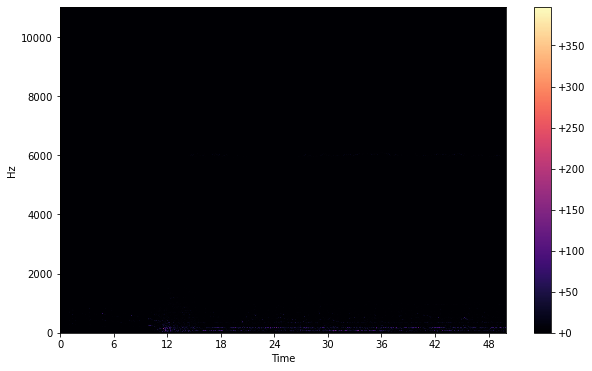

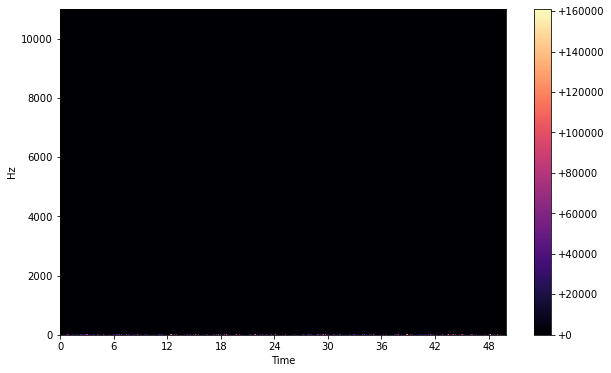

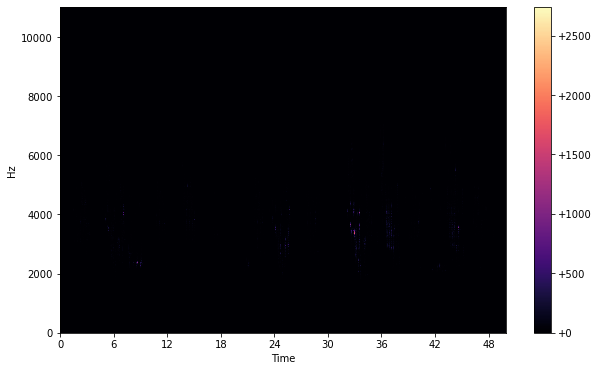

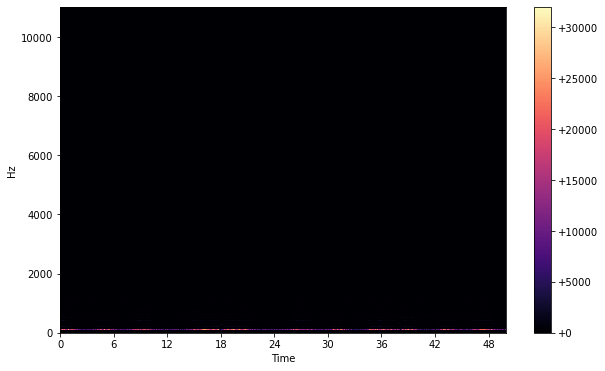

In [75]:
plot_spectogram(y_drone, sr, HOP_LENGTH)
plot_spectogram(y_thunder, sr, HOP_LENGTH)
plot_spectogram(y_bird, sr, HOP_LENGTH)
plot_spectogram(y_aircraft, sr, HOP_LENGTH)


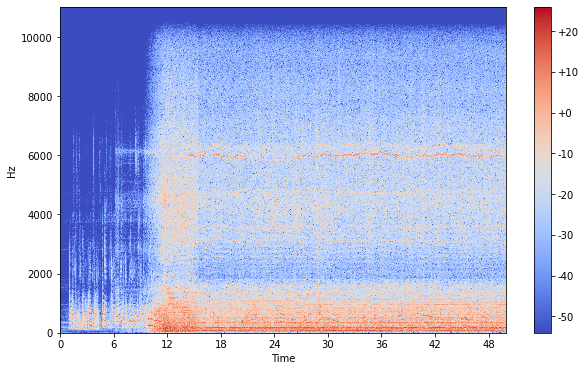

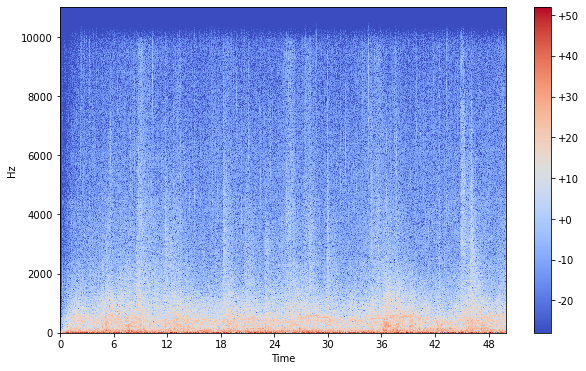

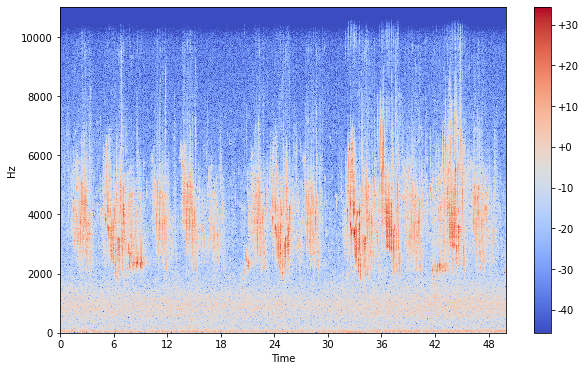

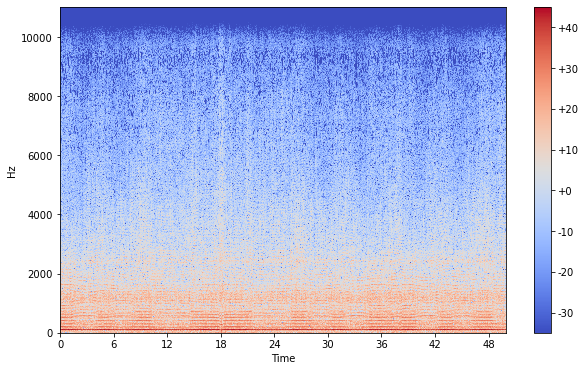

In [76]:
#this is a log amplitude representation

y_log_drone = librosa.power_to_db(y_drone)
plot_spectogram(y_log_drone,sr,HOP_LENGTH) #passing the log spectorgram above in teh function of plotting


y_log_thunder = librosa.power_to_db(y_thunder)
plot_spectogram(y_log_thunder,sr,HOP_LENGTH)

y_log_bird = librosa.power_to_db(y_bird)
plot_spectogram(y_log_bird,sr,HOP_LENGTH)
                
y_log_aircraft = librosa.power_to_db(y_aircraft)
plot_spectogram(y_log_aircraft,sr,HOP_LENGTH)

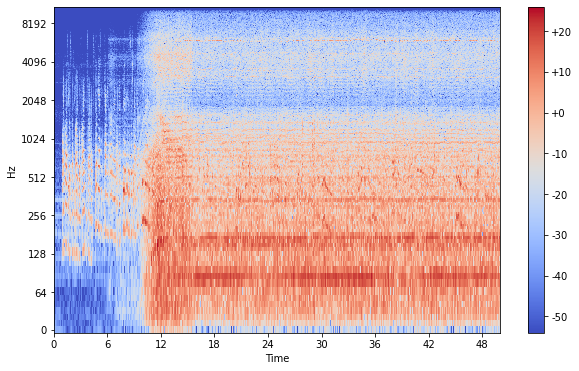

In [77]:
#we percive frequency also in log function so we will add frequency also as functionof log 
plot_spectogram(y_log_drone, sr, HOP_LENGTH, y_axis="log")



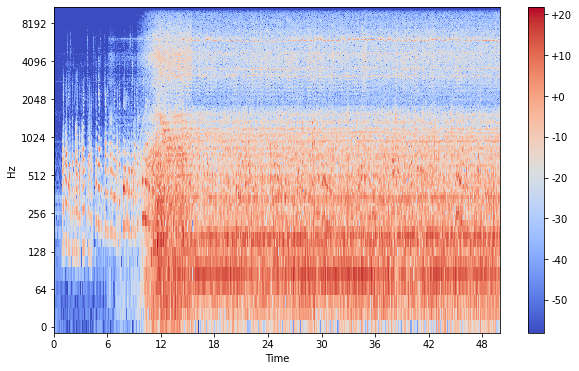

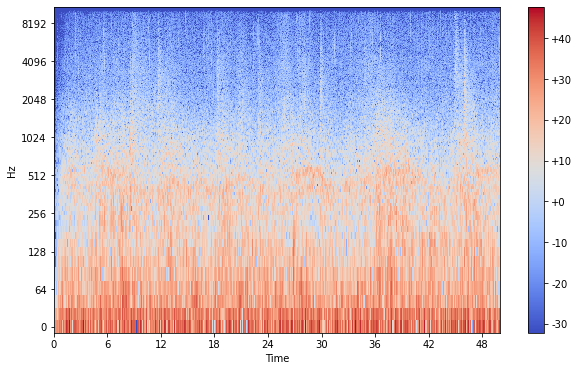

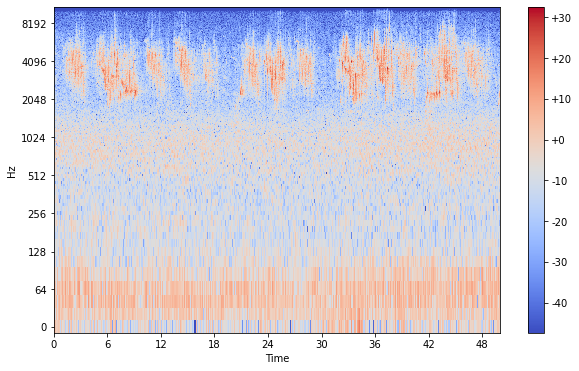

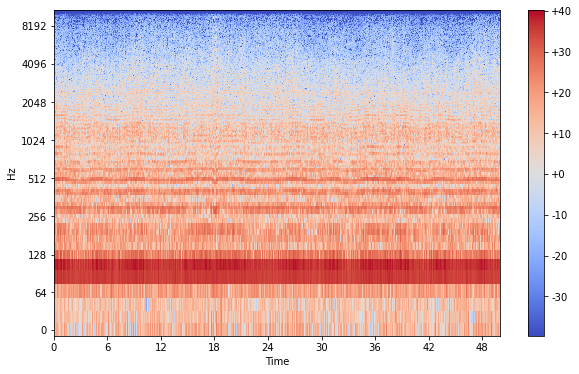

In [78]:
s_drone = librosa.stft(drone, n_fft=FRAME_SIZE, hop_length= HOP_LENGTH)
#FOR THE TRANSFORMATION TO STFT
y_drone = librosa.power_to_db(np.abs(s_drone)**2) #square magnitude power to decibles 
plot_spectogram(y_drone, sr, HOP_LENGTH, y_axis="log")

s_thunder = librosa.stft(thunder, n_fft=FRAME_SIZE, hop_length= HOP_LENGTH)
#FOR THE TRANSFORMATION TO STFT
y_thunder = librosa.power_to_db(np.abs(s_thunder)**2) #square magnitude power to decibles 
plot_spectogram(y_thunder, sr, HOP_LENGTH, y_axis="log")


s_bird = librosa.stft(bird, n_fft=FRAME_SIZE, hop_length= HOP_LENGTH)
#FOR THE TRANSFORMATION TO STFT
y_bird = librosa.power_to_db(np.abs(s_bird)**2) #square magnitude power to decibles 
plot_spectogram(y_bird, sr, HOP_LENGTH, y_axis="log")


s_aircraft = librosa.stft(aircraft, n_fft=FRAME_SIZE, hop_length= HOP_LENGTH)
#FOR THE TRANSFORMATION TO STFT
y_aircraft = librosa.power_to_db(np.abs(s_aircraft)**2) #square magnitude power to decibles 
plot_spectogram(y_aircraft, sr, HOP_LENGTH, y_axis="log")




#log representation of frequecy
#The x-axis represents time, and the y-axis represents frequency.
#Each point in the spectrogram represents the 
#amplitude of the signal at a particular time and frequency.
#we are seeing log amp log freq spectorgram
#log magnitud spectogram
#the y-axis typically represents the frequency range of the signal being analyzed.
#now this has both log amplitude value on y axis and log frequncy on x 


# extracting mel spectprgram

# analog to digital conversion

# mel filter bands


In [70]:
#default sampling rate with librosa is 22050

In [79]:
filter_banks =librosa.filters.mel(n_fft=2048, sr=22050, n_mels=50) #n_mels = number of mel bands we will see

#filter banks - these are set of band pass filter use to extract 
                #frequency information from the audio signal
                #they mimic the log rithimic audiotory system of human
                #they are triangular and evenly shaped on mel frequency scale 
            
            #EACH FILTER REPRESNET THE PEAK OF THE TRIANGULAR FILTER
            #THEY OVERLAP WITH EACH OTHER TO PROVIDE COMPLETE COVERAGE
            
#vanilla spec we did earlier 
#mel spectogram and vanilla is matrix multiplied  

#onthe x axis of mel filter bands has frequency and on teh y axis is the weight 

In [80]:
filter_banks.shape #cciolum 1025 is the nyquist frequncy of the 
                    #frame size of ours that is the highest frequncy in taht window or frame

(50, 1025)

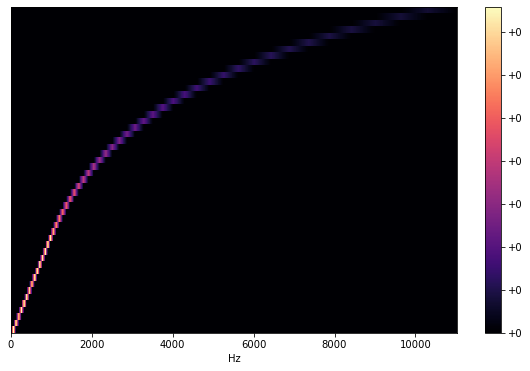

In [81]:
plt.figure(figsize = [10,6])
librosa.display.specshow(filter_banks,sr=sr,x_axis="linear")

plt.colorbar(format="%+2.f")
plt.show()


plt.show()

#ON THE Y AXIS WE HAVE 10 DIFFERENT MEL BAND  THAT IS WE HAVE TAKEN IN THE ABIOVE CELL AS 
#N_MELS 
#color grading is the weights
#it is a doubt

# now mel spectogram

In [84]:
mel_spectogram_drone = librosa.feature.melspectrogram(drone, sr=sr,n_fft = 2048, hop_length=512,n_mels=20)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass y=[5.0599239e-05 2.6060217e-05 2.2599004e-05 ... 1.2765962e-02 1.1492370e-02
 5.7485984e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


In [85]:
mel_spectogram_thunder = librosa.feature.melspectrogram(thunder, sr=sr,n_fft = 2048, hop_length=512,n_mels=50)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass y=[0.         0.         0.         ... 0.22406864 0.21526635 0.20595641] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


In [86]:
mel_spectogram_bird = librosa.feature.melspectrogram(bird, sr=sr,n_fft = 2048, hop_length=512,n_mels=50)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass y=[ 0.0037013   0.01010615  0.01165779 ...  0.03797908  0.00839775
 -0.0342328 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


In [87]:
mel_spectogram_aircraft = librosa.feature.melspectrogram(aircraft, sr=sr,n_fft = 2048, hop_length=512,n_mels=50)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass y=[ 2.0989433e-05  1.3439442e-04  3.6639377e-04 ... -1.7780213e-02
 -3.0402355e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


In [90]:
mel_spectogram_bird.shape #coloumn 3064 shows number of temporal bins 
#temporal bins  =  In mel spectrograms, temporal bins refer to the time intervals or segments

                    #into which the audio signal is divided for the purpose of computing the spectrogram.

(50, 2154)

In [91]:
log_mel_spectrogram_drone = librosa.power_to_db(mel_spectogram_drone)
log_mel_spectrogram_thunder = librosa.power_to_db(mel_spectogram_thunder)
log_mel_spectrogram_bird = librosa.power_to_db(mel_spectogram_bird)
log_mel_spectrogram_aircraft = librosa.power_to_db(mel_spectogram_aircraft)

#moving from mel spectrogram to log mel spectrogram

In [93]:
log_mel_spectrogram_bird.shape #log transsformation happen sfor each item
                            #that is why the log also  has same shape

(50, 2154)

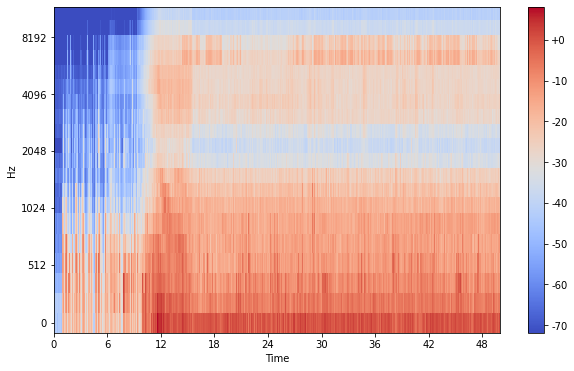

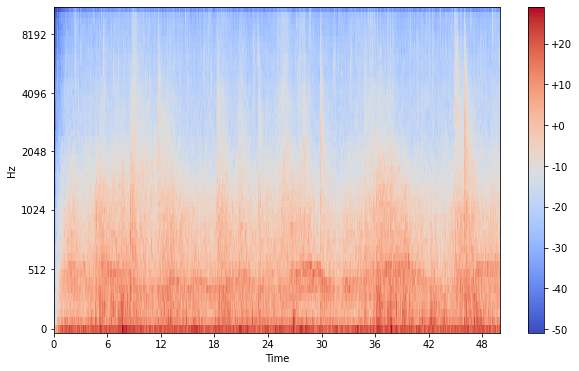

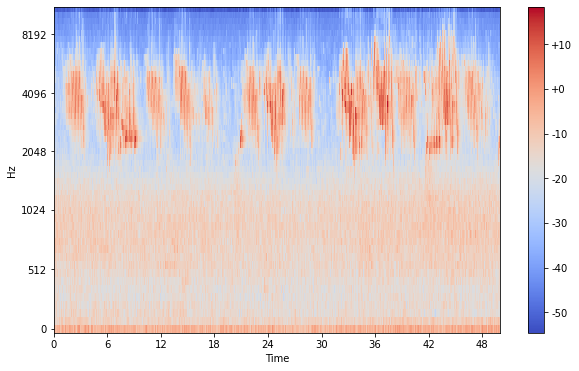

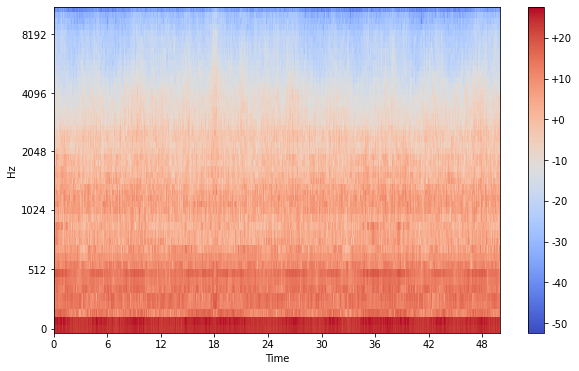

In [94]:
plt.figure(figsize = (10,6))
librosa.display.specshow(log_mel_spectrogram_drone,x_axis = "time", y_axis = "mel", sr=sr)
plt.colorbar(format = "%+2.f")
plt.show()

plt.figure(figsize = (10,6))
librosa.display.specshow(log_mel_spectrogram_thunder,x_axis = "time", y_axis = "mel", sr=sr)
plt.colorbar(format = "%+2.f")
plt.show()


plt.figure(figsize = (10,6))
librosa.display.specshow(log_mel_spectrogram_bird,x_axis = "time", y_axis = "mel", sr=sr)
plt.colorbar(format = "%+2.f")
plt.show()


plt.figure(figsize = (10,6))
librosa.display.specshow(log_mel_spectrogram_aircraft,x_axis = "time", y_axis = "mel", sr=sr)
plt.colorbar(format = "%+2.f")
plt.show()


#x axis has discrete time 
#each bin is a frame now that is temporal bins 


# mfcc 

In [95]:
mfcc_drone = librosa.feature.mfcc(drone, n_mfcc = 13, sr=sr)

mfcc_thunder = librosa.feature.mfcc(thunder, n_mfcc = 13, sr=sr)

mfcc_bird = librosa.feature.mfcc(bird, n_mfcc = 13, sr=sr)

mfcc_air = librosa.feature.mfcc(aircraft, n_mfcc = 13, sr=sr)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass y=[5.0599239e-05 2.6060217e-05 2.2599004e-05 ... 1.2765962e-02 1.1492370e-02
 5.7485984e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.
F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.22406864 0.21526635 0.20595641] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until
F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[ 0.0037013   0.01010615  0.01165779 ...  0.03797908  0.00839775
 -0.0342328 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """
F:\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Pass y=[ 2.0989433e-05  1.34

In [110]:
mfcc.shape

(13, 3064)

In [112]:
#visualizaing mfcc

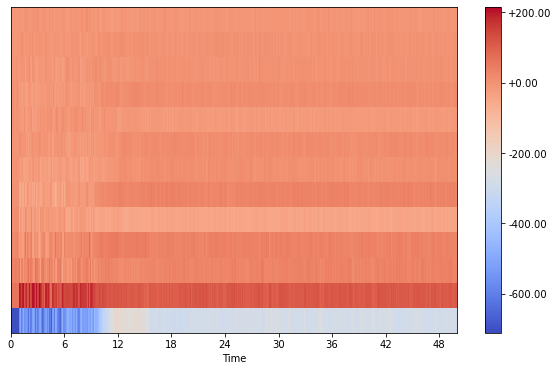

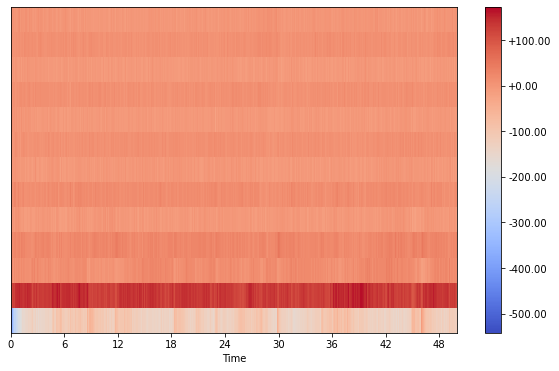

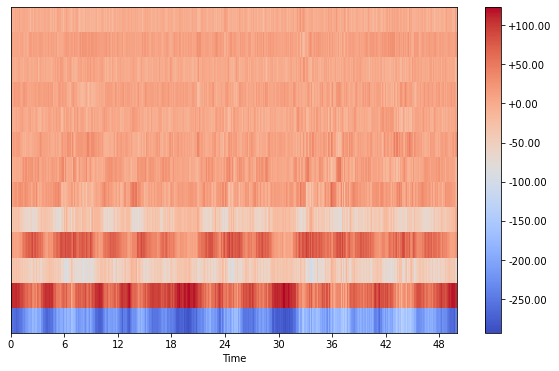

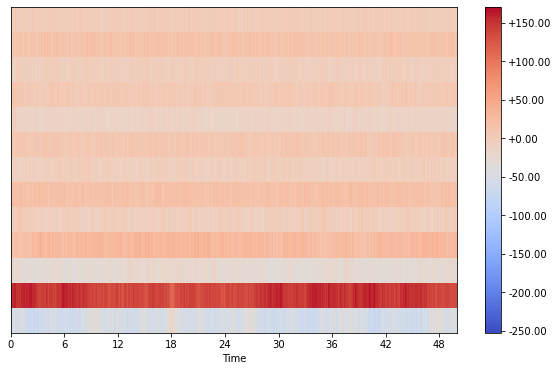

In [101]:
plt.figure(figsize=(10,6))
librosa.display.specshow(mfcc_drone,x_axis="time",sr=sr)

plt.colorbar(format="%+.2f")

plt.show()

plt.figure(figsize=(10,6))
librosa.display.specshow(mfcc_thunder,x_axis="time",sr=sr)

plt.colorbar(format="%+.2f")

plt.show()

plt.figure(figsize=(10,6))
librosa.display.specshow(mfcc_bird,x_axis="time",sr=sr)

plt.colorbar(format="%+.2f")

plt.show()


plt.figure(figsize=(10,6))
librosa.display.specshow(mfcc_air,x_axis="time",sr=sr)

plt.colorbar(format="%+.2f")

plt.show()
 #representing the ferquency content of the audio signal 
    #in a time varying manner
    
    #graphis gsowing the mel scaled power spec
    #where power spectrum is first using stft and then transformed into 
    #mel freq spectogram using filter banks 
    #mel freq spectogram thenconverted to coefficients that captures the spectral envelope 
    #of the audio signal  
    
    #color is representing how much a coefficients that is 1 of the 13\
    #has magnitude that is how much it is present in the signal 
    #a particular coefficent is present in the signal at that time.

In [104]:
#calculate delta and delta-delta mfcc

delta_mfcc_drone = librosa.feature.delta(mfcc_drone)
delta2_mfcc_drone = librosa.feature.delta(mfcc_drone, order = 2)

delta_mfcc_thunder = librosa.feature.delta(mfcc_thunder)
delta2_mfcc_thunder = librosa.feature.delta(mfcc_thunder, order = 2)

delta_mfcc_bird = librosa.feature.delta(mfcc_bird)
delta2_mfcc_bird = librosa.feature.delta(mfcc_bird, order = 2)

delta_mfcc_air = librosa.feature.delta(mfcc_air)
delta2_mfcc_air = librosa.feature.delta(mfcc_air, order = 2)

In [122]:
delta_mfcc.shape

(13, 3064)

In [123]:
delta2_mfcc.shape

(13, 3064)

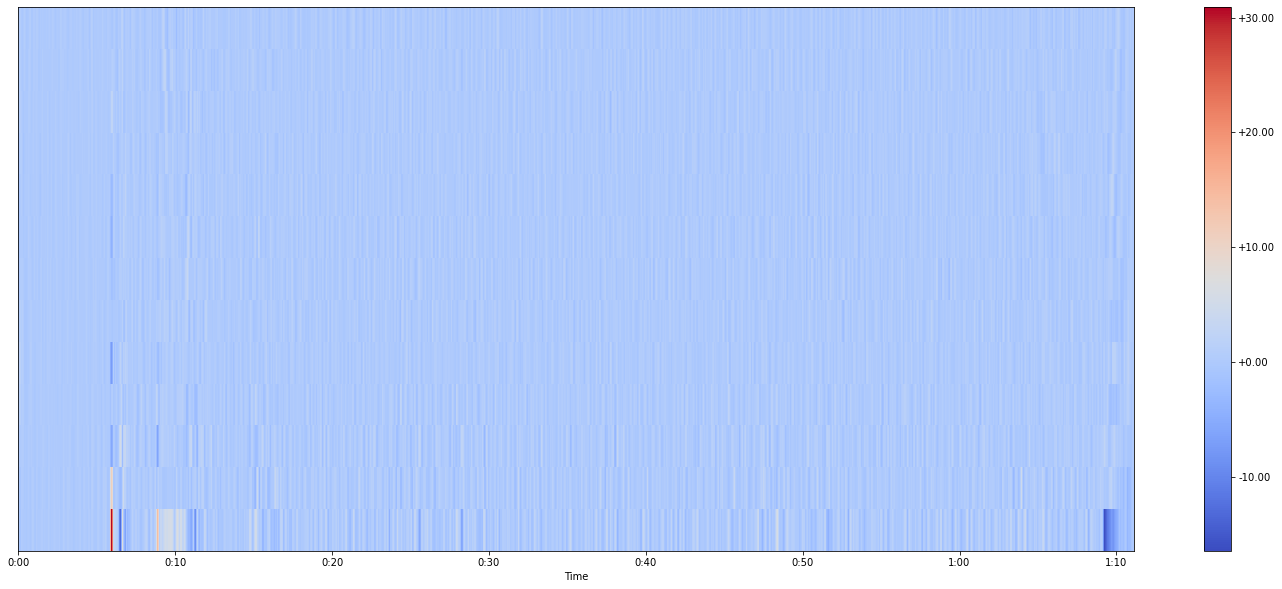

In [125]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfcc,x_axis="time",sr=sr)

plt.colorbar(format="%+.2f")

plt.show()

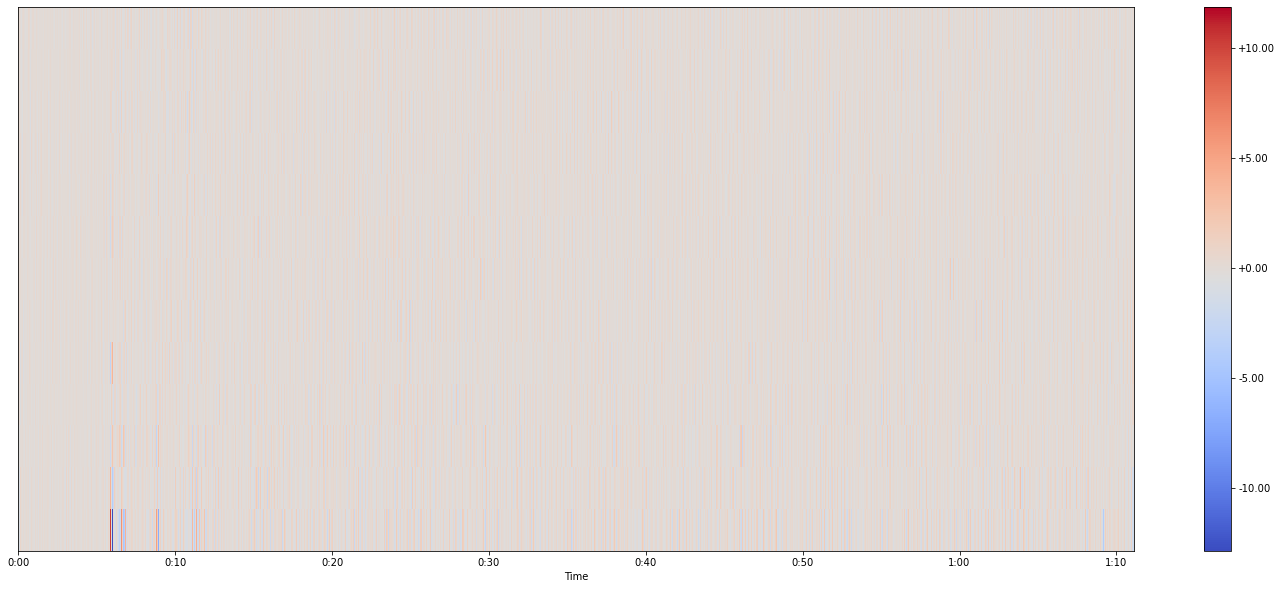

In [126]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfcc,x_axis="time",sr=sr)

plt.colorbar(format="%+.2f")

plt.show()

In [110]:
#concateneting delta delta-delta and other nromal mel fcc 

comprehensive_mfcc_drone = np.concatenate((mfcc_drone, delta_mfcc_drone, delta2_mfcc_drone))
comprehensive_mfcc_thunder = np.concatenate((mfcc_thunder, delta_mfcc_thunder, delta2_mfcc_thunder))
comprehensive_mfcc_bird = np.concatenate((mfcc_bird, delta_mfcc_bird, delta2_mfcc_bird))
comprehensive_mfcc_air = np.concatenate((mfcc_air, delta_mfcc_air, delta2_mfcc_air))

In [129]:
comprehensive_mfcc.shape

(39, 3064)

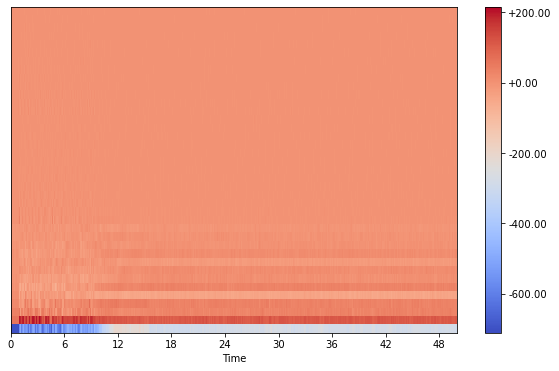

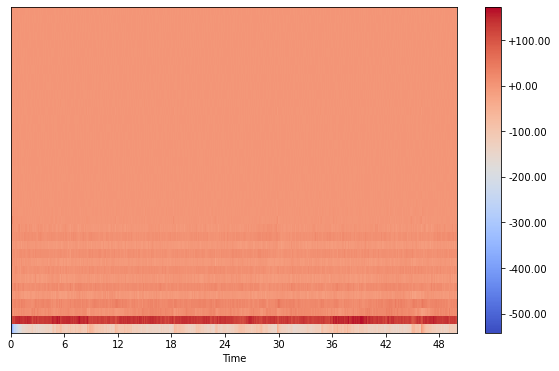

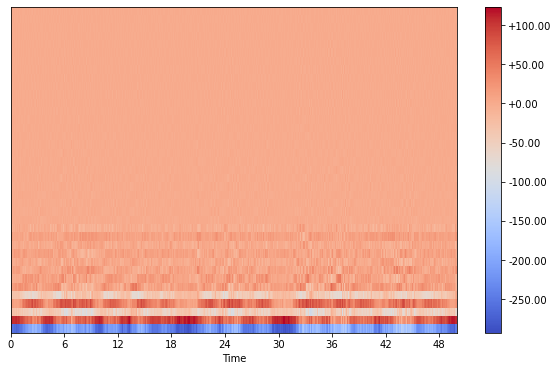

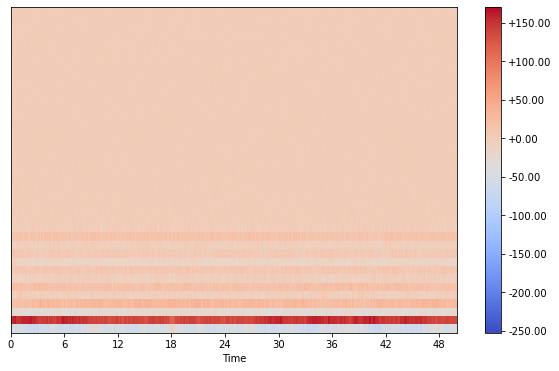

NameError: name 'comprehensive_mfcc' is not defined

<Figure size 1800x720 with 0 Axes>

In [113]:
plt.figure(figsize=(10,6))
librosa.display.specshow(comprehensive_mfcc_drone,x_axis="time",sr=sr)

plt.colorbar(format="%+.2f")

plt.show()

plt.figure(figsize=(10,6))
librosa.display.specshow(comprehensive_mfcc_thunder,x_axis="time",sr=sr)

plt.colorbar(format="%+.2f")

plt.show()

plt.figure(figsize=(10,6))
librosa.display.specshow(comprehensive_mfcc_bird,x_axis="time",sr=sr)

plt.colorbar(format="%+.2f")

plt.show()

plt.figure(figsize=(10,6))
librosa.display.specshow(comprehensive_mfcc_air,x_axis="time",sr=sr)

plt.colorbar(format="%+.2f")

plt.show()

plt.figure(figsize=(25,10))
librosa.display.specshow(comprehensive_mfcc,x_axis="time",sr=sr)

plt.colorbar(format="%+.2f")

plt.show()

# frequency doain audio features

In [96]:
S_drone.shape #frequency and time dimension

(1025, 2154)

In [104]:
S_drone_transpose = S_drone.T

S_thunder_transpose = S_thunder.T

S_bird_transpose = S_bird.T

S_aircraft_transpose = S_aircraft.T

In [105]:
# BAND ENERGY RATIO 
def calculate_split_frequenc_bin(spectogram, split_frequency, sample_rate):
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range/ spectogram.shape[0]
    split_frequency_bin = np.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)
    
    

In [107]:
split_frequency_bin_drone = calculate_split_frequenc_bin(S_drone,2000, sr)
split_frequency_bin_drone

185

In [110]:
split_frequency_bin_thunder = calculate_split_frequenc_bin(S_thunder,2000, sr)
split_frequency_bin_thunder

185

In [111]:
split_frequency_bin_bird = calculate_split_frequenc_bin(S_bird,2000, sr)
split_frequency_bin_bird

185

In [112]:
split_frequency_bin_aircraft = calculate_split_frequenc_bin(S_aircraft,2000, sr)
split_frequency_bin_aircraft

185

In [113]:
def calculate_band_energy_ratio(spectogram , split_frequency,sample_rate):
    split_frequency_bin_drone = calculate_split_frequenc_bin(spectogram, split_frequency,sample_rate)
    power_spec = np.abs(spectogram) ** 2
    power_spec = power_spec.T
    
    band_energy_ratio = []
    
    #calculating BEER for each frame
    for frequencies_in_frame in power_spec:
        sum_power_low_frequencies = np.sum(frequencies_in_frame[:split_frequency_bin])
        sum_power_high_frequencies = np.sum(frequencies_in_frame[split_frequency_bin:])
        ber_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(ber_current_frame)
        
    return np.array(band_energy_ratio)

In [114]:
ber_drone = calculate_band_energy_ratio(S_drone, 2000, sr)

In [115]:
ber_thunder = calculate_band_energy_ratio(S_thunder, 2000, sr)

In [116]:
ber_bird = calculate_band_energy_ratio(S_bird, 2000, sr)

In [117]:
ber_aircraft = calculate_band_energy_ratio(S_aircraft, 2000, sr)

In [118]:
ber_drone.shape

(2154,)

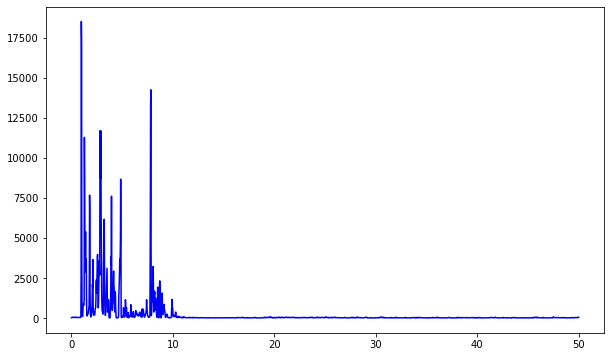

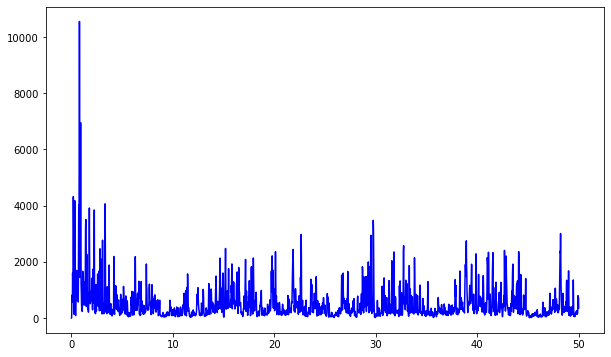

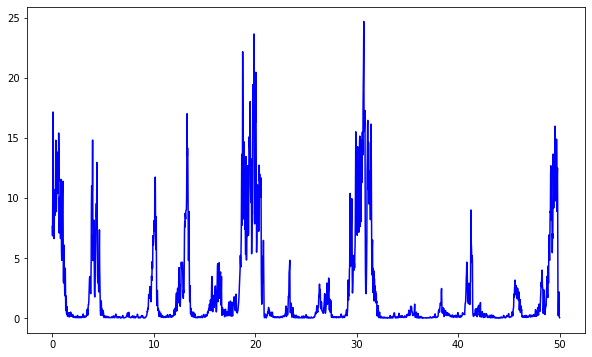

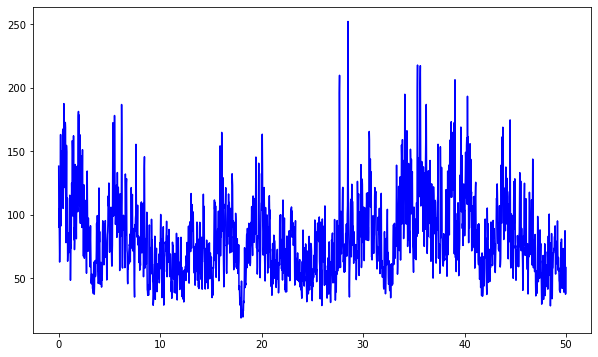

In [120]:
ber_frames = range(len(ber_drone))
t = librosa.frames_to_time(ber_frames, hop_length=HOP_LENGTH )
plt.figure(figsize=(10,6))
plt.plot(t, ber_drone, color ="b")
plt.show()

ber_frames = range(len(ber_thunder))
t = librosa.frames_to_time(ber_frames, hop_length=HOP_LENGTH )
plt.figure(figsize=(10,6))
plt.plot(t, ber_thunder, color ="b")
plt.show()

ber_frames = range(len(ber_bird))
t = librosa.frames_to_time(ber_frames, hop_length=HOP_LENGTH )
plt.figure(figsize=(10,6))
plt.plot(t, ber_bird, color ="b")
plt.show()

ber_frames = range(len(ber_aircraft))
t = librosa.frames_to_time(ber_frames, hop_length=HOP_LENGTH )
plt.figure(figsize=(10,6))
plt.plot(t, ber_aircraft, color ="b")
plt.show()

In [195]:
sc_drone = librosa.feature.spectral_centroid(y=drone, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [196]:
sc_drone.shape

(3064,)

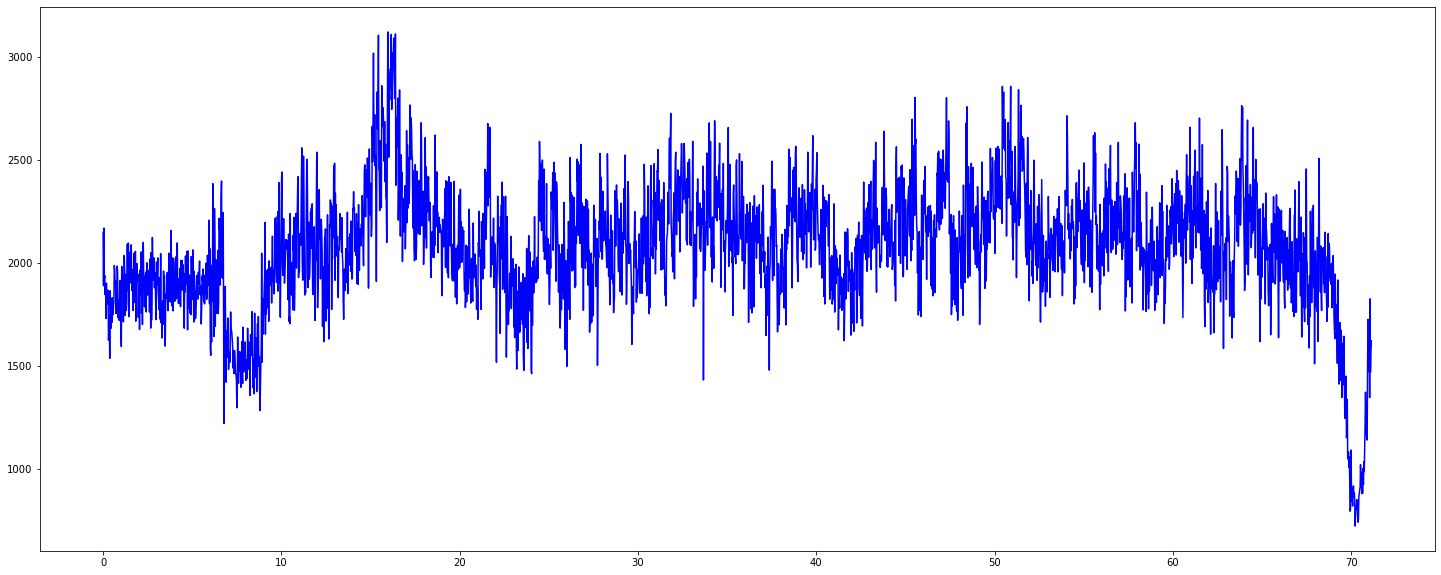

In [200]:
#spectralcentroid  visualizing
sc_frame = range(len(sc_drone))
t = librosa.frames_to_time(sc_frame)

plt.figure(figsize=(25,10))

plt.plot(t,sc_drone, color ='b')

plt.show()

spectral bandwith

In [201]:
ban_drone = librosa.feature.spectral_bandwidth(y=drone, sr=sr, n_fft= FRAME_SIZE, hop_length= HOP_LENGTH)[0]

In [202]:
ban_drone.shape

(3064,)

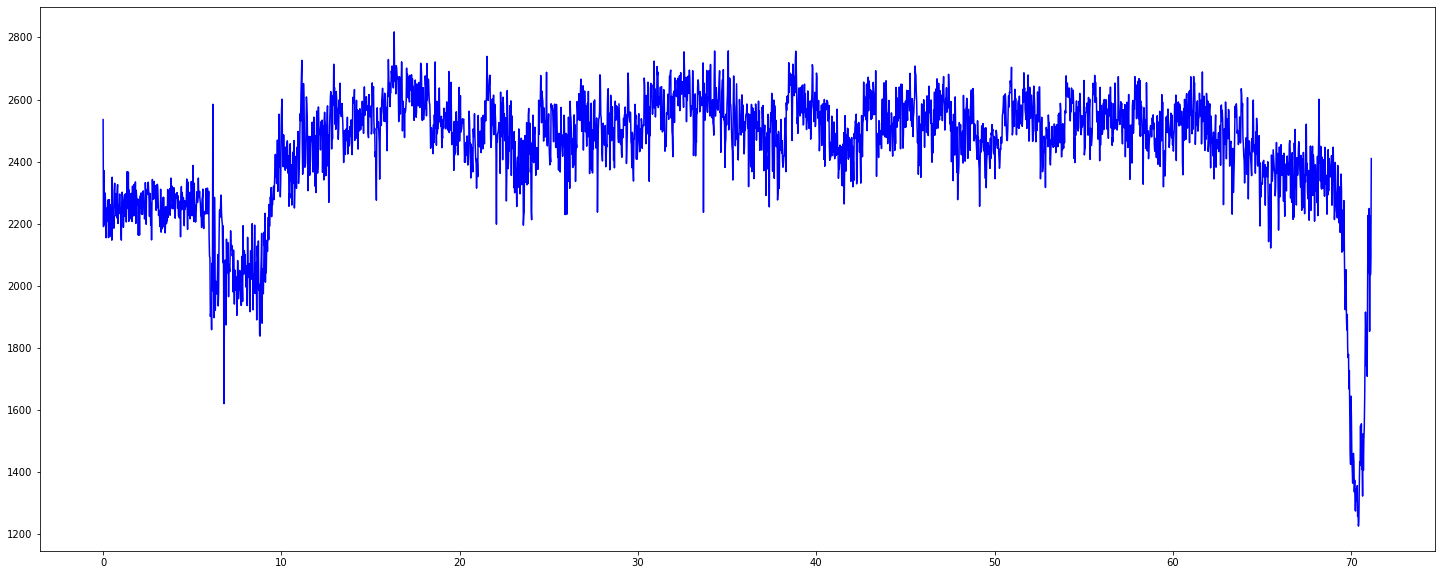

In [207]:
ban_frame = range(len(ban_drone))
t = librosa.frames_to_time(ban_frame)

plt.figure(figsize=(25,10))

plt.plot(t,ban_drone, color ='b')

plt.show()

#derived from the spectral centro

NameError: name 'sr' is not defined